In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\climate_nasa.csv")

In [3]:
df

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [4]:
df.isna().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [5]:
(df.isna().sum()/df.shape[0])*100

date              0.000000
likesCount        0.000000
profileName       0.000000
commentsCount    53.256705
text              3.448276
dtype: float64

In [6]:
df.drop(columns=["commentsCount","profileName"],axis=1,inplace=True)

In [7]:
df["text"].fillna("NO comment",inplace=True)

In [8]:
df.isna().sum()

date          0
likesCount    0
text          0
dtype: int64

In [9]:
df["date"]

0      2022-09-07T17:12:32.000Z
1      2022-09-08T14:51:13.000Z
2      2022-09-07T17:19:41.000Z
3      2022-09-08T00:51:30.000Z
4      2022-09-07T19:06:20.000Z
                 ...           
517    2022-12-22T17:21:37.000Z
518    2022-12-22T17:19:51.000Z
519    2022-12-22T17:12:57.000Z
520    2022-12-22T17:01:12.000Z
521    2022-12-22T17:00:08.000Z
Name: date, Length: 522, dtype: object

In [10]:
from datetime import datetime
df["date"]=pd.to_datetime(df['date'])

In [11]:
df["Date"]=df["date"].dt.day
df["Month"]=df["date"].dt.month
df["year"]=df["date"].dt.year

In [12]:
df.drop(columns=["date"],axis=1,inplace=True)

In [13]:
df.dtypes

likesCount     int64
text          object
Date           int32
Month          int32
year           int32
dtype: object

In [14]:
df["length"]=df['text'].apply(len)

In [15]:
df

,likesCount,text,Date,Month,year,length
0,2,Neat comparison I have not heard it before.\n ...,7,9,2022,173
1,0,An excellent way to visualise the invisible! T...,8,9,2022,51
2,1,Does the CO2/ghg in the troposphere affect the...,7,9,2022,108
3,4,excellent post! I defo feel the difference - o...,8,9,2022,94
4,16,"Yes, and carbon dioxide does not harm the Eart...",7,9,2022,128
...,...,...,...,...,...,...
517,0,One can only hope for a peak 😞,22,12,2022,30
518,1,what is the error margin for the temperature e...,22,12,2022,76
519,3,We all should volenteerly help in reducing Glo...,22,12,2022,58
520,1,Sergio Yepes,22,12,2022,12


In [16]:
df.describe()

,likesCount,Date,Month,year,length
count,522.000000,522.000000,522.000000,522.000000,522.000000
mean,4.720307,17.511494,9.687739,2021.356322,179.383142
std,12.053556,7.027015,1.844274,1.118441,519.864498
min,0.000000,1.000000,1.000000,2020.000000,1.000000
25%,0.000000,15.000000,9.000000,2020.000000,37.000000
50%,1.000000,16.000000,9.000000,2021.000000,88.500000
75%,4.000000,23.000000,11.000000,2022.000000,176.000000
max,126.000000,31.000000,12.000000,2023.000000,7649.000000


C:\Users\uzuma\AppData\Local\Temp\ipykernel_23328\3858697360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["length"])


<Axes: xlabel='length', ylabel='Density'>

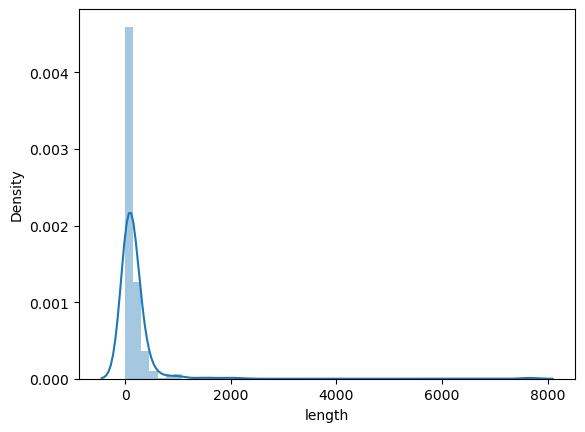

In [17]:
sns.distplot(df["length"])

In [18]:
df[df["length"]>7000]

,likesCount,text,Date,Month,year,length
45,0,The “greenhouse effect” is concerned with the ...,6,1,2023,7649
475,0,The “greenhouse effect” is concerned with the ...,6,1,2023,7649


In [19]:
df["text"]=df["text"].apply(lambda x:x.lower())

In [20]:
df

,likesCount,text,Date,Month,year,length
0,2,neat comparison i have not heard it before.\n ...,7,9,2022,173
1,0,an excellent way to visualise the invisible! t...,8,9,2022,51
2,1,does the co2/ghg in the troposphere affect the...,7,9,2022,108
3,4,excellent post! i defo feel the difference - o...,8,9,2022,94
4,16,"yes, and carbon dioxide does not harm the eart...",7,9,2022,128
...,...,...,...,...,...,...
517,0,one can only hope for a peak 😞,22,12,2022,30
518,1,what is the error margin for the temperature e...,22,12,2022,76
519,3,we all should volenteerly help in reducing glo...,22,12,2022,58
520,1,sergio yepes,22,12,2022,12


In [21]:
print("Mean length",df["length"].mean())
print("Std dev",df["length"].std())
print("Median",df["length"].median())
print("Minimum length",df["length"].min())
print("Maximum length",df["length"].max())

Mean length 179.3831417624521
Std dev 519.8644983864783
Median 88.5
Minimum length 1
Maximum length 7649


In [22]:
df[df["length"]==7649]["text"].iloc[0]

'the “greenhouse effect” is concerned with the infrared radiation given off by the earth. the sun’s radiation basically passes through the oxygen and nitrogen in the earth’s atmosphere and lands on the earth’s surface, where 70% of it is absorbed; 30% is reflected back into the atmosphere. part of this radiation bounces off the greenhouse gases and returns to be absorbed by earth. the greenhouses gases (ghgs) are water vapor (h2o), carbon dioxide (co2), nitrous oxide (no2) and methane (ch4).\n\nhow long does co2 remain in the atmosphere? this is a difficult question because there are several processes that remove carbon dioxide from the atmosphere. from 65% to 80% of the co2 that is released into the air dissolves into the ocean over a period of 50-200 years. the rest is removed over several hundred thousand years. according to the ipcc fourth assessment report, about 50% of co2 increase will be removed from the atmosphere within 30 years, another 30% will be removed within a few centu

In [23]:
df[df["length"]==1]["text"].iloc[0]

'😭'

In [24]:
df.head()

,likesCount,text,Date,Month,year,length
0,2,neat comparison i have not heard it before.\n ...,7,9,2022,173
1,0,an excellent way to visualise the invisible! t...,8,9,2022,51
2,1,does the co2/ghg in the troposphere affect the...,7,9,2022,108
3,4,excellent post! i defo feel the difference - o...,8,9,2022,94
4,16,"yes, and carbon dioxide does not harm the eart...",7,9,2022,128


In [ ]:
# clean the data using nltk

In [25]:
import re
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words=stopwords.words("english")

In [28]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
len(stop_words)

179

In [30]:
df["text"]=df["text"].str.lower()

In [31]:
df["text"]

0      neat comparison i have not heard it before.\n ...
1      an excellent way to visualise the invisible! t...
2      does the co2/ghg in the troposphere affect the...
3      excellent post! i defo feel the difference - o...
4      yes, and carbon dioxide does not harm the eart...
                             ...                        
517                       one can only hope for a peak 😞
518    what is the error margin for the temperature e...
519    we all should volenteerly help in reducing glo...
520                                         sergio yepes
521    we're experiencing severe, abnormal weather pa...
Name: text, Length: 522, dtype: object

In [32]:
ls=[]

for i in df["text"][0].split():
    if i not in stop_words:
        ls.append(i)

In [33]:
ls

['neat',
 'comparison',
 'heard',
 'before.',
 'would',
 'say',
 'co2',
 'like',
 'disco',
 'ball',
 'energy',
 'collide',
 'countless',
 'molecules',
 'bounces',
 'around',
 'atmosphere.']

In [34]:
" ".join(ls)

'neat comparison heard before. would say co2 like disco ball energy collide countless molecules bounces around atmosphere.'

In [35]:
def stop_word_clean(x):
    return " ".join([words for words in str(x).split() if words not in stop_words])

In [36]:
df["text"]=df["text"].apply(lambda x: stop_word_clean(x))

In [37]:
df["after_stop"]=df["text"].apply(len)

In [38]:
df.head()

,likesCount,text,Date,Month,year,length,after_stop
0,2,neat comparison heard before. would say co2 li...,7,9,2022,173,121
1,0,excellent way visualise invisible! thanks,8,9,2022,51,41
2,1,co2/ghg troposphere affect stratosphere? warme...,7,9,2022,108,75
3,4,excellent post! defo feel difference - one dri...,8,9,2022,94,65
4,16,"yes, carbon dioxide harm earth like people mak...",7,9,2022,128,90


In [39]:
def removal_url(text):
    return re.sub('https?://(?:www\.)?[\w\.-]+\.[a-zA-Z]{2,}(?:/[\w\.-]*)*/?','',text)

In [40]:
df["text"]=df["text"].apply(lambda x: removal_url(x))

In [41]:
df["after_url"]= df["text"].apply(len)
df.head(1)

,likesCount,text,Date,Month,year,length,after_stop,after_url
0,2,neat comparison heard before. would say co2 li...,7,9,2022,173,121,121


In [42]:
print(df["after_url"].max())

5584


In [43]:
def removal_username(text):
    return re.sub('@[^\s]+','',text)

In [44]:
df["text"]=df["text"].apply(lambda x: removal_username(x))

In [45]:
df["after_username"]= df["text"].apply(len)
df.head(1)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username
0,2,neat comparison heard before. would say co2 li...,7,9,2022,173,121,121,121


In [46]:
def removal_number(text):
    return re.sub('[0-9]+','',text)

In [47]:
df["text"]=df["text"].apply(lambda x: removal_number(x))

In [48]:
df["after_number"]= df["text"].apply(len)

In [49]:
df.head()

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number
0,2,neat comparison heard before. would say co lik...,7,9,2022,173,121,121,121,120
1,0,excellent way visualise invisible! thanks,8,9,2022,51,41,41,41,41
2,1,co/ghg troposphere affect stratosphere? warmer...,7,9,2022,108,75,75,75,74
3,4,excellent post! defo feel difference - one dri...,8,9,2022,94,65,65,65,65
4,16,"yes, carbon dioxide harm earth like people mak...",7,9,2022,128,90,90,90,90


In [50]:
def removal_extraspace(text):
    return re.sub('\s+',' ',text)

In [51]:
df["text"]=df["text"].apply(lambda x: removal_extraspace(x))
df["after_white_space"]= df["text"].apply(len)
df.head(2)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number,after_white_space
0,2,neat comparison heard before. would say co lik...,7,9,2022,173,121,121,121,120,120
1,0,excellent way visualise invisible! thanks,8,9,2022,51,41,41,41,41,41


In [52]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [53]:
df["text"]=df["text"].apply(lambda x: deEmojify(x))
df["after_deEmojify"]= df["text"].apply(len)
df.head(2)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify
0,2,neat comparison heard before. would say co lik...,7,9,2022,173,121,121,121,120,120,120
1,0,excellent way visualise invisible! thanks,8,9,2022,51,41,41,41,41,41,41


In [54]:
print(df["after_white_space"].max())
print(df["after_deEmojify"].max())

5266
5249


In [55]:
def removal_xhtml(text):
    pattern= re.compile(r"quot")
    return re.sub(pattern,"",text)

In [56]:
df["text"]=df["text"].apply(lambda x: removal_xhtml(x))
df["after_removal_xhtml"]= df["text"].apply(len)
df.head(2)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml
0,2,neat comparison heard before. would say co lik...,7,9,2022,173,121,121,121,120,120,120,120
1,0,excellent way visualise invisible! thanks,8,9,2022,51,41,41,41,41,41,41,41


In [57]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def removal_punc(text):
    trans=str.maketrans('','',punc)
    return text.translate(trans)

In [59]:
df["text"]=df["text"].apply(lambda x: removal_punc(x))
df["after_punctuation"]= df["text"].apply(len)
df.head(2)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml,after_punctuation
0,2,neat comparison heard before would say co like...,7,9,2022,173,121,121,121,120,120,120,120,118
1,0,excellent way visualise invisible thanks,8,9,2022,51,41,41,41,41,41,41,41,40


In [60]:
df["after_punctuation"].max()

5007

In [61]:
df[df["after_punctuation"]==5007]['text'].iloc[0]

'greenhouse effect concerned infrared radiation given earth suns radiation basically passes oxygen nitrogen earths atmosphere lands earths surface  absorbed  reflected back atmosphere part radiation bounces greenhouse gases returns absorbed earth greenhouses gases ghgs water vapor ho carbon dioxide co nitrous oxide no methane ch long co remain atmosphere difficult question several processes remove carbon dioxide atmosphere   co released air dissolves ocean period  years rest removed several hundred thousand years according ipcc fourth assessment report  co increase removed atmosphere within years another  removed within centuries remaining  may stay atmosphere thousands years means could stop carbon dioxide emissions tomorrow carbon dioxide atmosphere would continue warm climate thousands years methane ch contrast persists years thus even though methane times potent carbon dioxide effect relatively shortlived furthermore methane increased ppb ppb today notice parts per billion parts pe

In [62]:
df.isna().sum()

likesCount             0
text                   0
Date                   0
Month                  0
year                   0
length                 0
after_stop             0
after_url              0
after_username         0
after_number           0
after_white_space      0
after_deEmojify        0
after_removal_xhtml    0
after_punctuation      0
dtype: int64

In [63]:
df["after_punctuation"].min()

0

In [64]:
df.duplicated().sum()

10

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

0

In [67]:
df.head(5)

,likesCount,text,Date,Month,year,length,after_stop,after_url,after_username,after_number,after_white_space,after_deEmojify,after_removal_xhtml,after_punctuation
0,2,neat comparison heard before would say co like...,7,9,2022,173,121,121,121,120,120,120,120,118
1,0,excellent way visualise invisible thanks,8,9,2022,51,41,41,41,41,41,41,41,40
2,1,coghg troposphere affect stratosphere warmer t...,7,9,2022,108,75,75,75,74,74,74,74,71
3,4,excellent post defo feel difference one drink...,8,9,2022,94,65,65,65,65,65,65,65,62
4,16,yes carbon dioxide harm earth like people maki...,7,9,2022,128,90,90,90,90,90,90,90,86


In [68]:
drop_index=df[df["after_punctuation"]==df["after_punctuation"].min()][["text"]].index

In [69]:
drop_index

Index([25, 26, 50, 70, 74, 90, 329, 334, 385, 446, 448, 471, 477, 478], dtype='int64')

In [70]:
df.drop(drop_index,inplace=True)

In [71]:
df.drop(df.columns[2:],axis=1,inplace=True)

In [72]:
df.head()

,likesCount,text
0,2,neat comparison heard before would say co like...
1,0,excellent way visualise invisible thanks
2,1,coghg troposphere affect stratosphere warmer t...
3,4,excellent post defo feel difference one drink...
4,16,yes carbon dioxide harm earth like people maki...


In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [74]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [76]:
df["Sentiment"]=df["text"].apply(get_sentiment)

In [77]:
print(df[['text','Sentiment']])

                                                  text Sentiment
0    neat comparison heard before would say co like...  Positive
1             excellent way visualise invisible thanks  Positive
2    coghg troposphere affect stratosphere warmer t...  Positive
3    excellent post defo feel difference  one drink...  Positive
4    yes carbon dioxide harm earth like people maki...  Negative
..                                                 ...       ...
517                                     one hope peak   Positive
518     error margin temperature estimations years ago  Negative
519          volenteerly help reducing globall warming  Positive
520                                       sergio yepes   Neutral
521  were experiencing severe abnormal weather patt...  Negative

[498 rows x 2 columns]


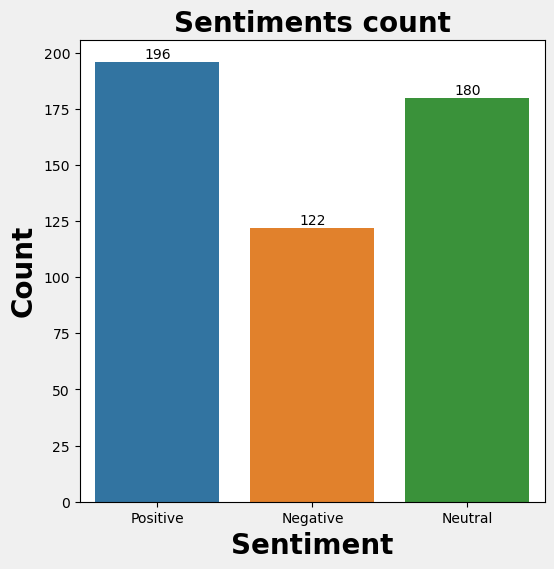

In [78]:
plt.figure(figsize=(6,6))
axes=sns.countplot(x="Sentiment",data=df)
plt.title("Sentiments count",fontweight='bold',size=20)
plt.xlabel("Sentiment",fontweight='bold',size=20)
plt.ylabel("Count",fontweight='bold',size=20)
plt.gcf().set_facecolor('#F0F0F0')
for bars in axes.containers:
    axes.bar_label(bars)
    
plt.show()    

In [79]:
#pip install pandas numpy gensim nltk pyLDAvis

In [80]:
df["Sentiment"]=df["Sentiment"].map({'Neutral':0,'Positive':1,'Negative':2})

In [81]:
df

,likesCount,text,Sentiment
0,2,neat comparison heard before would say co like...,1
1,0,excellent way visualise invisible thanks,1
2,1,coghg troposphere affect stratosphere warmer t...,1
3,4,excellent post defo feel difference one drink...,1
4,16,yes carbon dioxide harm earth like people maki...,2
...,...,...,...
517,0,one hope peak,1
518,1,error margin temperature estimations years ago,2
519,3,volenteerly help reducing globall warming,1
520,1,sergio yepes,0


In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\uzuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
from nltk.stem import WordNetLemmatizer

In [84]:
wnl=WordNetLemmatizer()

In [85]:
print(df["Sentiment"].value_counts())

Sentiment
1    196
0    180
2    122
Name: count, dtype: int64


In [86]:
x=df["text"]
y=df["Sentiment"]


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
print(f"Original x shape:{len(x)}")
print(f"Original y shape:{len(y)}")

Original x shape:498
Original y shape:498


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,)

In [90]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [91]:
#Initialize TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=400)


In [92]:
#Fit and Trabsform training data
X_train_tfid=vectorizer.fit_transform(x_train)

In [93]:
# Initializer RandomUnderSampler
rus=RandomUnderSampler(random_state=42)

In [94]:
# Resample trainig data
x_res,y_res=rus.fit_resample(X_train_tfid,y_train)

In [95]:
# Print Original and resampled shapes
print("Original shape:",X_train_tfid.shape,y_train.shape)
print("Resampled shape:", x_res.shape,y_res.shape)

Original shape: (373, 400) (373,)
Resampled shape: (291, 400) (291,)


In [96]:
#Train a  Naive Bayes classifier on resampled data
nb=MultinomialNB()
nb.fit(x_res,y_res)

MultinomialNB()

In [97]:
#Make the Prediction on test data
y_pred=nb.predict(vectorizer.transform(x_test))

In [98]:
#Evaluate the model Perforamnce
print("Accuarcy:",accuracy_score(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuarcy: 0.592
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        41
           1       0.73      0.73      0.73        59
           2       0.30      0.40      0.34        25

    accuracy                           0.59       125
   macro avg       0.56      0.55      0.55       125
weighted avg       0.61      0.59      0.60       125

Confusion Matrix:
[[21  8 12]
 [ 5 43 11]
 [ 7  8 10]]


In [99]:
# Get user input

new_review=input("Enter a review:")

Enter a review:excellent way visualise invisible thanks 	


In [100]:
# Transform the new review into a numerical representation
new_review_tfidf = vectorizer.transform([new_review])

In [101]:
 #Make a prediction on the new review
prediction = nb.predict(new_review_tfidf)

# Print the predicted label
print("Predicted label:", prediction[0])



Predicted label: 1


In [102]:
# checking with new review

new_review=input("Enter a review:")

Enter a review:sergio yepes 	


In [103]:
new_review_tfidf = vectorizer.transform([new_review])
prediction = nb.predict(new_review_tfidf)
print("Predicted label:", prediction[0])


Predicted label: 0


# Conclusion

The Climate Sentiment Analysis project aimed to analyze the sentiment of climate-related text data from the NASA climate dataset. The project involved data preprocessing, sentiment intensity analysis, and machine learning model training. The results showed an accuracy of 59% in predicting the sentiment of the text data. While the results are promising, there is room for improvement in terms of data quality, feature engineering, and model selection.


# Recommendations

1. Data Quality Improvement: Further clean and preprocess the data to remove noise and inconsistencies. This can involve handling missing values, removing stop words, and stemming or lemmatizing words.
2. Feature Engineering: Explore additional features that can improve the accuracy of the model. This can involve extracting features from the text data, such as sentiment scores, topic models, or named entities.